In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('E:/jeans&trousers/train/jeans/img_04.jpeg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='E:/jeans&trousers/train/jeans', save_prefix='jeans', save_format='jpeg'):
    i += 1
    if i > 20:
        break

Using TensorFlow backend.


In [2]:
input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 200
nb_validation_samples = 200
batch_size = 32
epochs = 50

train_data_dir = 'E:/jeans&trousers/train/'
validation_data_dir = 'E:/jeans&trousers/test'

In [3]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        class_mode='binary')

Found 221 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
______________________________________

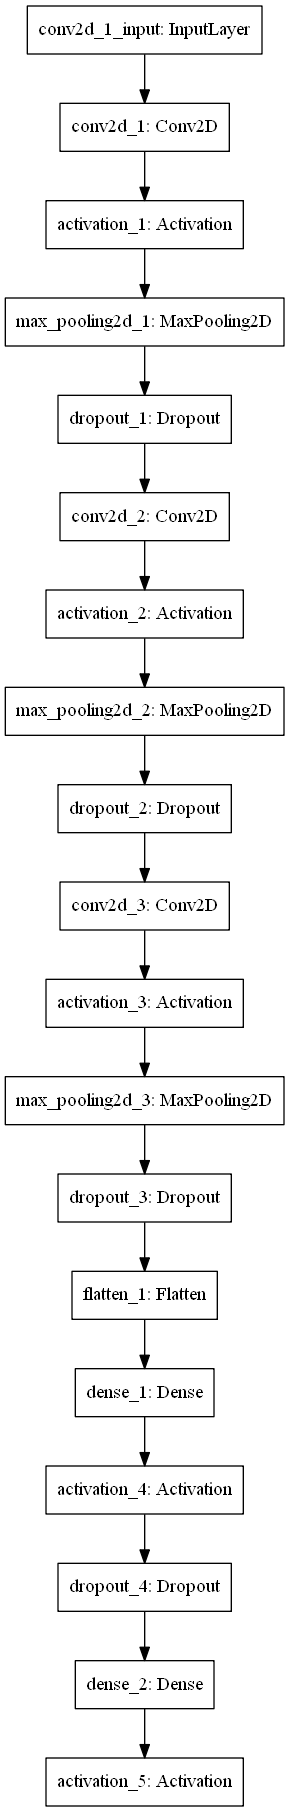

In [5]:
import keras
keras.utils.plot_model(
    model,
    to_file="model.png"
)

In [6]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

train_datagen_augmented = ImageDataGenerator(
             rescale=1./255,         # normalize pixel values to [0,1]
             shear_range=0.2,       # randomly applies shearing tranformation
             zoom_range=0.2,        # randomly applies shearing tranformation
             rotation_range = 30,
             horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 221 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)


Epoch 1/50
6/6 [==============================] - 7s 1s/step - loss: 2.3370 - accuracy: 0.4624 - val_loss: 0.6924 - val_accuracy: 0.4896
Epoch 2/50
6/6 [==============================] - 6s 1s/step - loss: 0.7112 - accuracy: 0.5729 - val_loss: 0.6932 - val_accuracy: 0.5179
Epoch 3/50
6/6 [==============================] - 6s 1s/step - loss: 0.7015 - accuracy: 0.5312 - val_loss: 0.6930 - val_accuracy: 0.6190
Epoch 4/50
6/6 [==============================] - 6s 919ms/step - loss: 0.6812 - accuracy: 0.5161 - val_loss: 0.6930 - val_accuracy: 0.4643
Epoch 5/50
6/6 [==============================] - 8s 1s/step - loss: 0.6778 - accuracy: 0.6042 - val_loss: 0.6920 - val_accuracy: 0.5357
Epoch 6/50
6/6 [==============================] - 6s 961ms/step - loss: 0.6470 - accuracy: 0.6237 - val_loss: 0.6872 - val_accuracy: 0.4940
Epoch 7/50
6/6 [==============================] - 6s 976ms/step - loss: 0.6750 - accuracy: 0.6146 - val_loss: 0.6914 - val_accuracy: 0.4881
Epoch 8/50
6/6 [===============

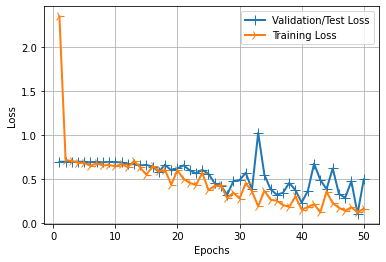

In [8]:
# plotting out loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

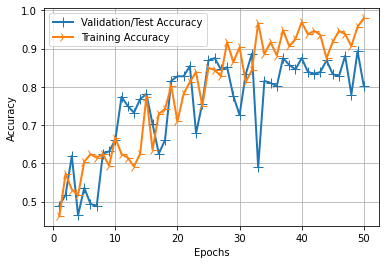

In [9]:
# Plotting the accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()